# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Assignment
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data set represents 17 direct marketing campaigns conducted by a single Portugese bank that occurred between May 2008 and November 2010 including a total of 79354 contacts. Propsective customers were contacted via phone and presented an "attractive long-term deposit application, with good interest rates. An 8% success rate was observed over the entire dataset.

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [36]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [37]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Question : Are there any nulls in the data?

In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Observations
*   There are no nulls or missing data points in the data set. 

### Question : Are there any correlations among the numeric datapoints?

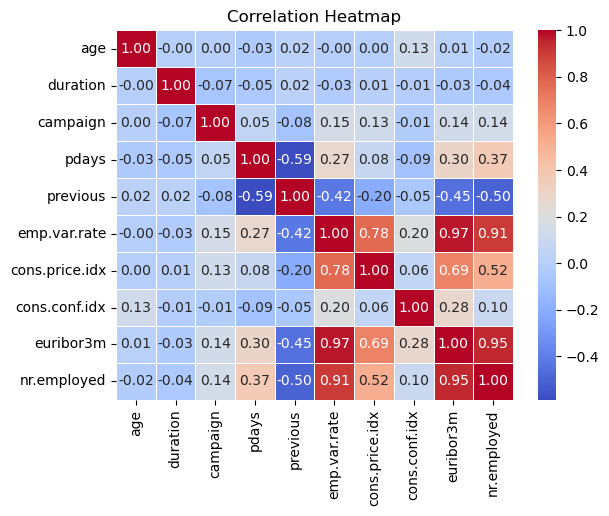

In [40]:
numeric_features = df.select_dtypes(include=['int', 'float'])
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Observations
*   The euribor3m and nr.employed features are highly positively correlated, so we might remove one to avoid issues with KNN or Logistic Regression. 

### Question : How many features will we have after one-hot encoding our categorical features?

In [41]:
distinct_value_counts = df.select_dtypes(include=['object']).nunique()
print(distinct_value_counts)

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


In [42]:
distinct_value_counts.sum() + df.select_dtypes(include=['float', 'int']).shape[1]

65

#### Observations
*   We'll have a total of 65 features after one-hot encoding. 64 if we drop one of the two highly correlated numeric features. 
*   It's not immediately clear if any of the categorical features require ordinal encoding. Using "education" as an example, for the purposes of understanding education's impact on the success of a marketing campaign, it's probably better to stick to one-hot encoding. We're more interested in the amount of education as a specific category than we are in any sort of ranking of educational achievement.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Objective

 

The objective is to employ machine learning to improve the success rate of the clients marketing campaigns. This will involve identifying features that affect success training a model with good predictive capacity.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [44]:
scale_column = df.columns[0]  # First column for StandardScaler
onehot_columns = df.columns[1:7]  # Next six columns for OneHotEncoder

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [scale_column]),
        ('onehot', OneHotEncoder(), onehot_columns)
    ],
    remainder='drop'  # This will drop all other columns not specified
)

# Apply the transformations
transformed_data = preprocessor.fit_transform(df)

# Get new column names for one-hot encoded columns
ohe_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_columns)

# Combine with the scaled column name
all_columns = [scale_column] + list(ohe_columns)

# Create the DataFrame
transformed_df = pd.DataFrame(transformed_data.toarray(), columns=all_columns)

In [45]:
transformed_df['target'] = df['y']

In [46]:
transformed_df.shape

(41188, 35)

In [47]:
transformed_df.head(5)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,target
0,1.533034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no
1,1.628993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no
2,-0.290186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,no
3,-0.002309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no
4,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [48]:
X = transformed_df.drop('target', axis=1)
y = transformed_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat? Note, our majority class is 'No' as in an unsuccessful marketing attempt.

When computing baseline, you're essentially predicing the majority class 100% of the time. This would give us an Accuracy baseline of .887, but a Recall baseline of 0. 

In [136]:
# transformed_df['target'].value_counts()
baseline = 36548 / (36548 + 4640)
print("Baseline Accuracy is : {}".format(baseline))

Baseline Accuracy is : 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [50]:
%%time
basic_lr = LogisticRegression(max_iter = 1000)
basic_lr.fit(X_train, y_train)

CPU times: user 518 ms, sys: 80.5 ms, total: 599 ms
Wall time: 208 ms


LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [51]:
#Train Accuracy
basic_lr.score(X_train, y_train)

0.887556904400607

In [52]:
#Test Accuracy
basic_lr.score(X_test, y_test)

0.8865015780529255

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN

In [53]:
%%time
# train and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 17.7 ms, sys: 19 µs, total: 17.7 ms
Wall time: 16.9 ms


KNeighborsClassifier()

In [54]:
# train accuracy
knn.score(X_train, y_train)

0.8897116843702579

In [55]:
# test accuracy
knn.score(X_test, y_test)

0.8755765962612284

#### Support Vector Machine

In [56]:
%%time
# train and fit the model
svm = SVC()
svm.fit(X_train, y_train)

CPU times: user 24.3 s, sys: 32.3 ms, total: 24.3 s
Wall time: 24.3 s


SVC()

In [57]:
# train accuracy
svm.score(X_train, y_train)

0.8882245827010622

In [58]:
# test accuracy
svm.score(X_test, y_test)

0.8867443554260743

#### Decision Tree

In [59]:
%%time
# train and fit the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

CPU times: user 79.5 ms, sys: 0 ns, total: 79.5 ms
Wall time: 78.2 ms


DecisionTreeClassifier()

In [60]:
# train accuracy
tree.score(X_train, y_train)

0.9166009104704097

In [61]:
# test accuracy
tree.score(X_test, y_test)

0.8605243991260014

In [62]:
df_performance = pd.DataFrame()
df_performance['model'] = ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree']
df_performance['Train Time'] = ['407ms', '20.6ms', '26.6s', '92.4ms']
df_performance['Train Accuracy'] = [0.887556904400607, 0.8897116843702579,
                        0.8882245827010622, 0.9166009104704097]
df_performance['Test Accuracy'] = [0.8865015780529255, 0.8726632677834426, 
                        0.8867443554260743, 0.8621024520514688]
df_performance

,model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,407ms,0.887557,0.886502
1,KNN,20.6ms,0.889712,0.872663
2,SVM,26.6s,0.888225,0.886744
3,DecisionTree,92.4ms,0.916601,0.862102


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Engineering
Previously, we restricted our data to the first 7 columns. Here we add in the full feature set. 

In [63]:
numeric_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.drop('y', axis = 1).select_dtypes(include=['object']).columns

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  
)

# Apply the transformations
transformed_data = preprocessor.fit_transform(df)

# Get new column names for one-hot encoded columns
ohe_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)

# Combine with the scaled column name
all_columns = list(numeric_features) + list(ohe_columns) + ['y']

# Create the DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_columns)
transformed_df.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,-0.290186,-0.12452,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


#### Train Test Split

In [119]:
X = transformed_df.drop('y', axis=1)
y = transformed_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create a custom scorer to favor recall over the default accuracy
custom_scorer = make_scorer(recall_score, pos_label='yes')


#### Improved Logistic Regression Model
Here we perform a basic grid search over the most common hyperparameters to find the best performing model.

In [122]:
%%time
lgr_pipe = Pipeline([('poly', PolynomialFeatures()),
                     ('lgr', LogisticRegression(random_state=22, max_iter=5000))])

params = {
    'lgr__solver': ['liblinear'],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__fit_intercept': [True, False],
    'poly__degree': [2],
}



lgr_grid = GridSearchCV(lgr_pipe, param_grid=params, cv=5, n_jobs=-1, scoring=custom_scorer)
lgr_grid.fit(X_train, y_train)
lgr_grid_train_score = lgr_grid.score(X_train, y_train)
lgr_grid_test_score = lgr_grid.score(X_test, y_test)
lgr_grid_best_params = knn_grid.best_params_

print("Training Score : {}".format(lgr_grid_train_score))
print("Test Score : {}".format(lgr_grid_test_score))
print("Best parameters of KNN: {}".format(lgr_grid_best_params))

Training Accuracy : 0.5452091767881242
Test Accuracy : 0.5240641711229946
Best parameters of KNN: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
CPU times: user 51.5 s, sys: 877 ms, total: 52.4 s
Wall time: 2min 5s


##### Improved Logistic Regression Model - Confusion Matrix

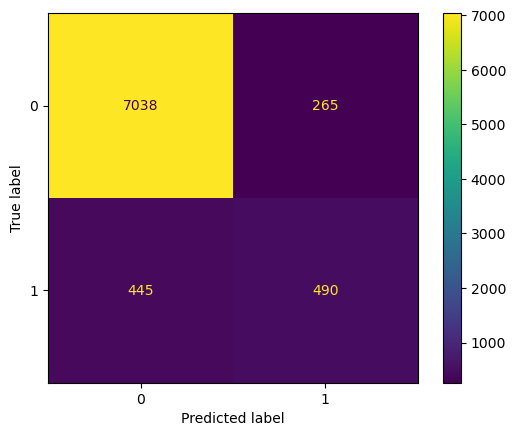

In [124]:
y_pred = lgr_grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Improved KNN Model
Here we perform a basic grid search over the most common hyperparameters to find the best performing model. We intentionally omit Polynomial features because KNN performance can be negatively affected by dimensionality.

In [125]:
%%time
knn = KNeighborsClassifier()

params = {'n_neighbors': [1, 2, 5, 10, 20],
          'weights' : ['uniform', 'distance'],
          'p': [1,2]
}
knn_grid = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1, scoring=custom_scorer)
knn_grid.fit(X_train, y_train)
knn_train_score = knn_grid.score(X_train, y_train)
knn_test_score = knn_grid.score(X_test, y_test)
knn_grid_best_params = knn_grid.best_params_


print("Training Score: {}".format(knn_train_score))
print("Test Score: {}".format(knn_test_score))
print(f'Best parameters of KNN: {knn_grid_best_params}')

Training Accuracy: 1.0
Test Accuracy: 0.46844919786096256
Best parameters of KNN: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
CPU times: user 27.4 s, sys: 1.22 s, total: 28.6 s
Wall time: 31.8 s


##### Improved KNN - Confusion Matrix

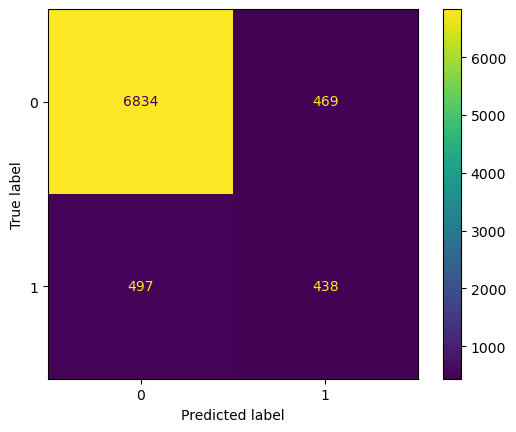

In [126]:
y_pred = knn_grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Improved SVM Model
Here we perform a basic grid search over the most common hyperparameters to find the best performing model.We omit Polynomial Features here, because the increased dimensionality requires more computational power.

In [145]:
%%time
params = {'svc__kernel': ['rbf', 'poly', 'linear'],
          'svc__gamma': [0.1, 1.0, 10.0],
          'svc__C' : [0.1, 1]
          }

svm_grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, verbose=2, scoring=custom_scorer).fit(X_train, y_train)
svm_grid_train_score = svm_grid.score(X_train, y_train)
svm_grid_test_score = svm_grid.score(X_test, y_test)
svm_grid_best_params = svm_grid.best_params_

print("Training Score : {}".format(svm_grid_train_score))
print("Test Score : {}".format(svm_grid_test_score))
print("Best parameters of SVM : {}".format(svm_grid_best_params))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=  39.4s
[CV] END .......svc__C=0.1, svc__gamma=1.0, svc__kernel=poly; total time=11.4min
[CV] END .......svc__C=1, svc__gamma=1.0, svc__kernel=linear; total time=  52.4s
[CV] END .......svc__C=1, svc__gamma=1.0, svc__kernel=linear; total time=  47.8s


/home/odeegan/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=  38.0s
[CV] END .......svc__C=0.1, svc__gamma=1.0, svc__kernel=poly; total time=13.9min
[CV] END .......svc__C=0.1, svc__gamma=0.1, svc__kernel=poly; total time=  38.5s
[CV] END .......svc__C=0.1, svc__gamma=1.0, svc__kernel=poly; total time=12.9min
[CV] END .........svc__C=1, svc__gamma=10.0, svc__kernel=rbf; total time= 7.3min
[CV] END ......svc__C=1, svc__gamma=10.0, svc__kernel=linear; total time=  40.3s
[CV] END .......svc__C=0.1, svc__gamma=0.1, svc__kernel=poly; total time=  39.7s
[CV] END .......svc__C=0.1, svc__gamma=1.0, svc__kernel=poly; total time=10.8min
[CV] END .......svc__C=1, svc__gamma=1.0, svc__kernel=linear; total time=  45.0s
[CV] END .......svc__C=1, svc__gamma=1.0, svc__kernel=linear; total time= 1.0min
[CV] END .......svc__C=1, svc__gamma=1.0, svc__kernel=linear; total time=  56.9s
[CV] END .........svc__C=1, svc__gamma=10.0, svc__kernel=rbf; total time= 7.6min
[CV] END .........svc__C=1, 

##### Improved SVM - Confusion Matrix

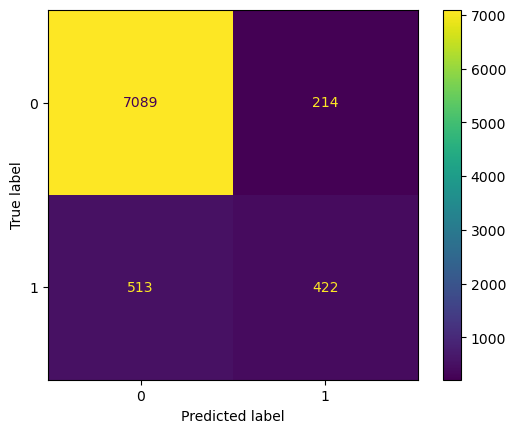

In [128]:
y_pred = svm_grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Improved Decision Tree Model
Here we perform a basic grid search over the most common hyperparameters to find the best performing model. We omit Polynomial Features because Decisions Trees can inherently represent non-linear relationships.

In [138]:
%%time
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': range(1, 10, 1),
         'min_samples_split': [0.1, 0.2, 0.05]}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params, n_jobs=-1, cv=5, scoring=custom_scorer).fit(X_train, y_train)
dt_grid_train_score = dt_grid.score(X_train, y_train)
dt_grid_test_score = dt_grid.score(X_test, y_test)
dt_grid_best_params = dt_grid.best_params_

print("Training Score : {}".format(dt_grid_train_score))
print("Test Score : {}".format(dt_grid_test_score))
print(f'Best parameters of tree: {dt_grid_best_params}')

Training Score : 0.41592442645074224
Test Score : 0.4042780748663102
Best parameters of tree: {'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}
CPU times: user 46.4 s, sys: 12.8 s, total: 59.3 s
Wall time: 1min 3s


##### Improved Decision Tree - Confusion Matrix

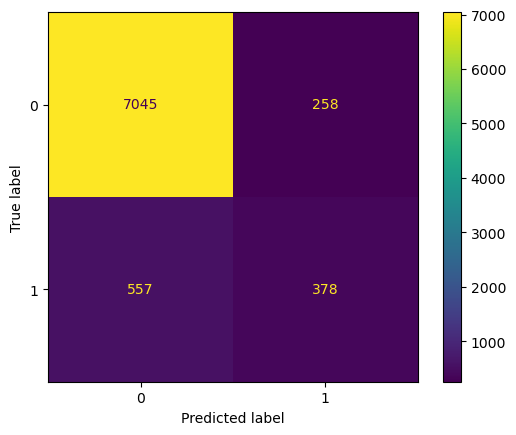

In [139]:
y_pred = dt_grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### Tree Plot

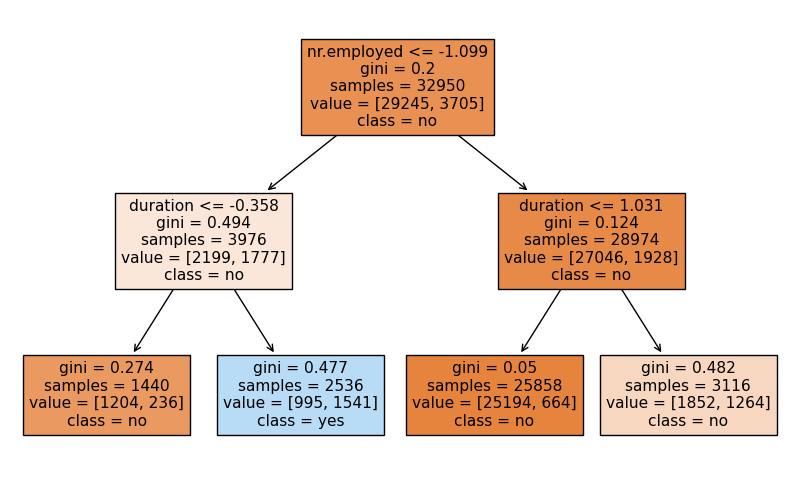

In [140]:
dtree = dt_grid.best_estimator_
plt.figure(figsize=(10, 6))
plot_tree(dtree, filled=True, feature_names=list(X_test.columns), class_names=list(map(str, dtree.classes_)))
plt.show()